In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# here in the TotalCharges column have blank space.
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
# so replacing spaces with 0 and change data type
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['customerID'].duplicated().sum()

np.int64(0)

In [11]:
# convert 0 and 1 value of SeniorCitizen to yes/no to make it easier to understand
def convert_yes_or_no(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'

In [12]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert_yes_or_no)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


[Text(0, 0, '5174'), Text(0, 0, '1869')]

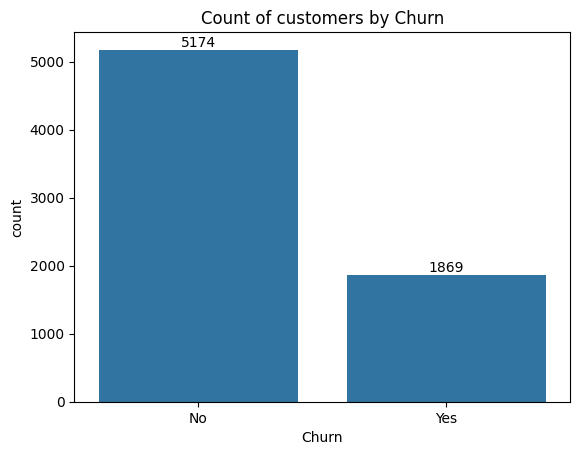

In [14]:
ax = sns.countplot(data=df, x=df['Churn'])
plt.title('Count of customers by Churn')
ax.bar_label(ax.containers[0])

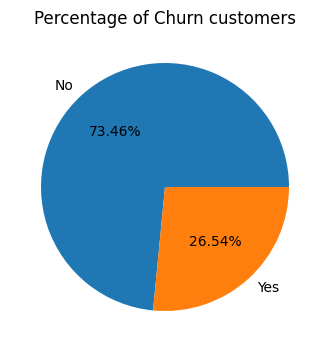

In [15]:
plt.figure(figsize=(4,5))
gb = df.groupby('Churn').agg({'Churn' : 'count'})
plt.pie(gb['Churn'], autopct='%0.2f%%', labels=gb.index)
plt.title('Percentage of Churn customers')
plt.show()

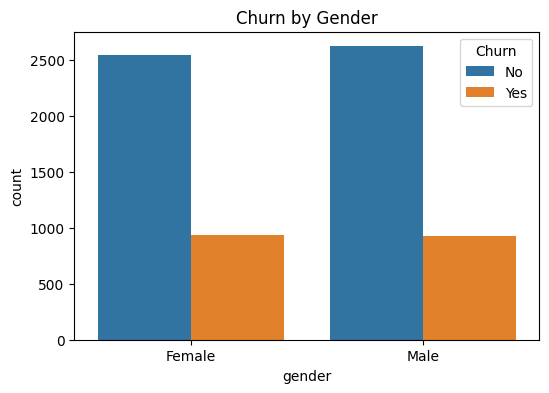

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=df['gender'], hue='Churn')
plt.title('Churn by Gender')
plt.show()

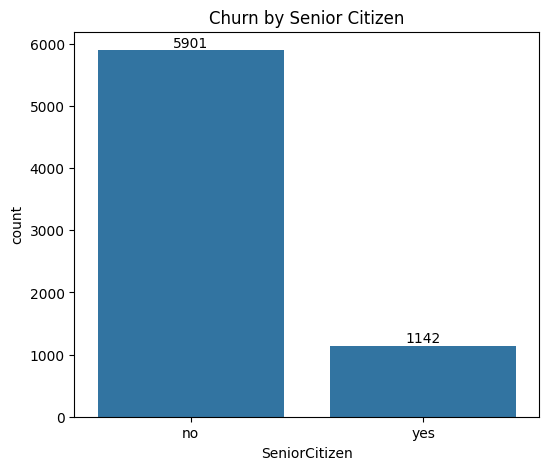

In [17]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data=df, x=df['SeniorCitizen'])
ax.bar_label(ax.containers[0])
plt.title('Churn by Senior Citizen')
plt.show()

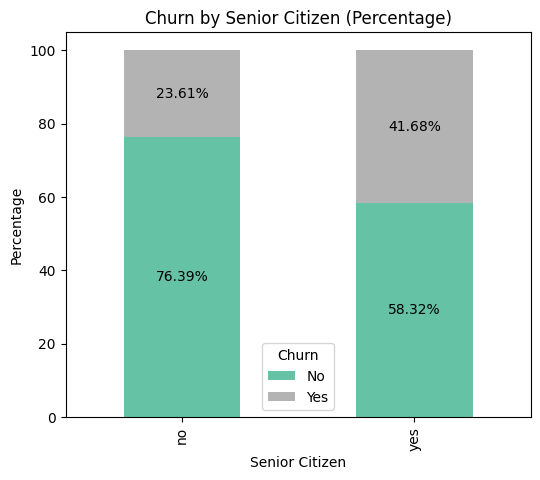

In [18]:
crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plotting the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(6, 5), colormap='Set2')

# Adding percentage labels to the bars
for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.text(x + width/2, y + height/2, f'{height:.2f}%', ha='center', va='center')

# Adding title and labels
plt.title('Churn by Senior Citizen (Percentage)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')

plt.show()

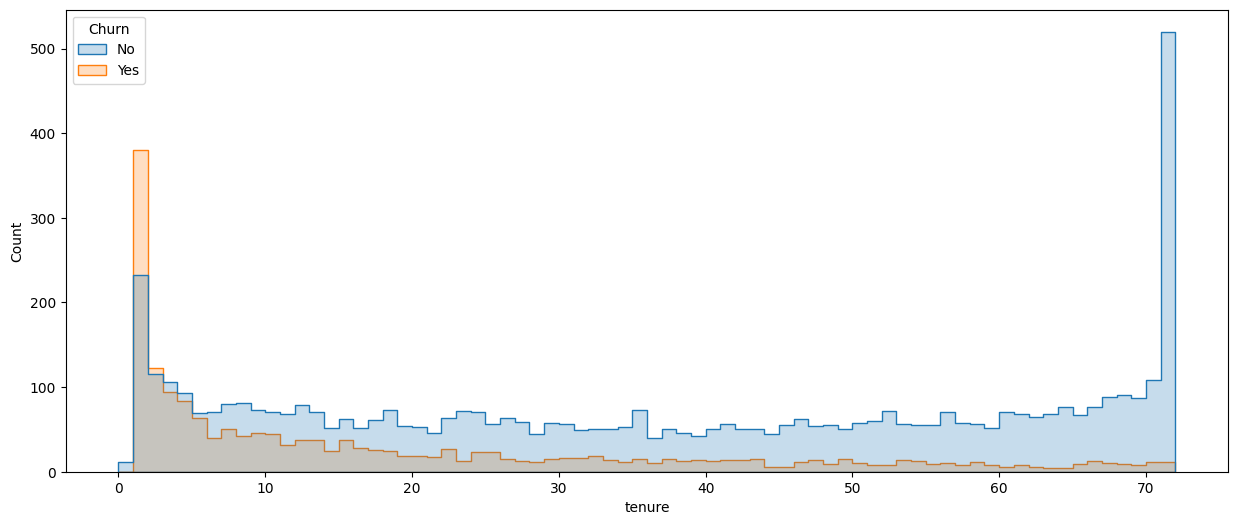

In [19]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x=df['tenure'], bins=72, hue='Churn', element='step')
plt.show()

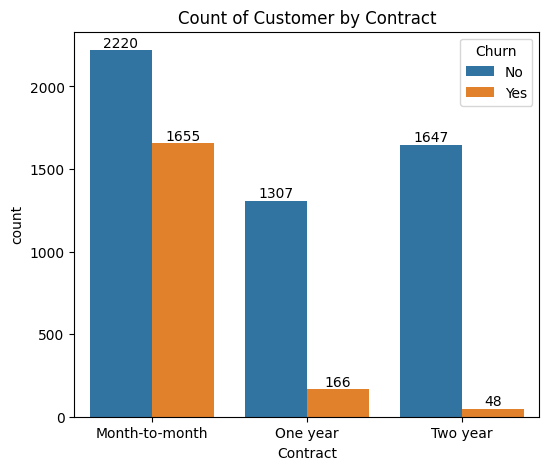

In [32]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data=df, x=df['Contract'], hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customer by Contract')
plt.show()

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

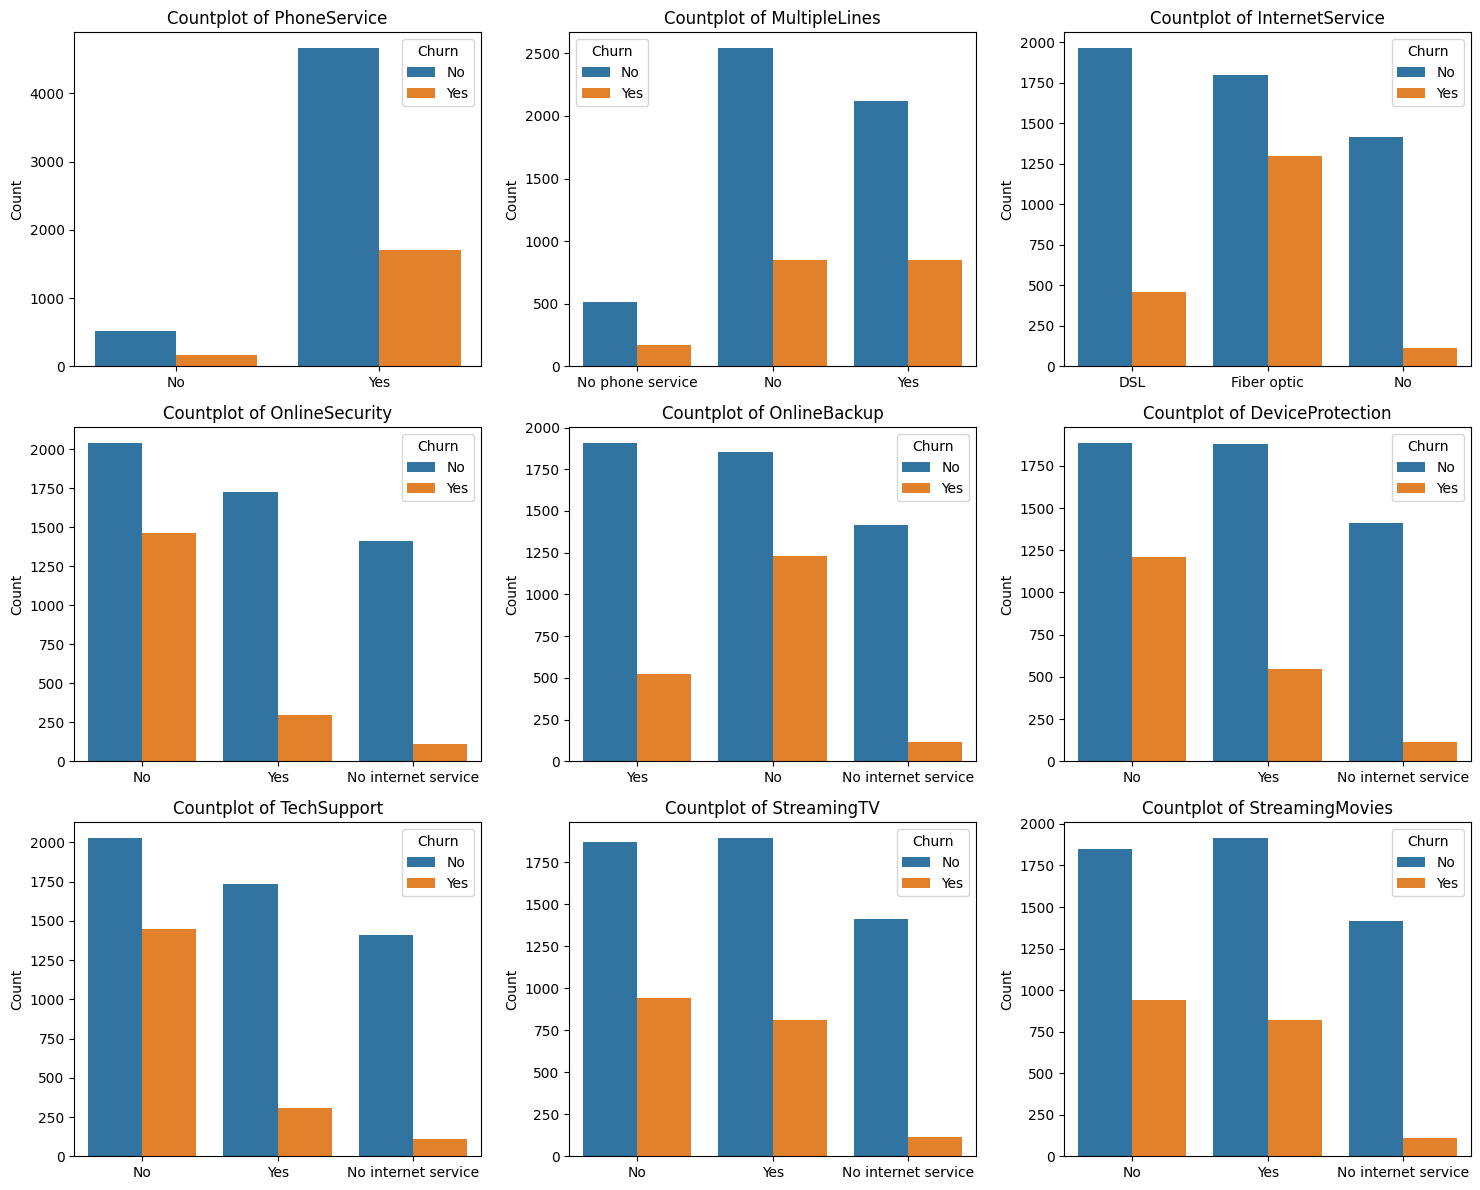

In [36]:
# List of columns you want to create countplots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and the axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate countplots for each column
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue="Churn")
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')  # Hide x-label for cleaner presentation
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

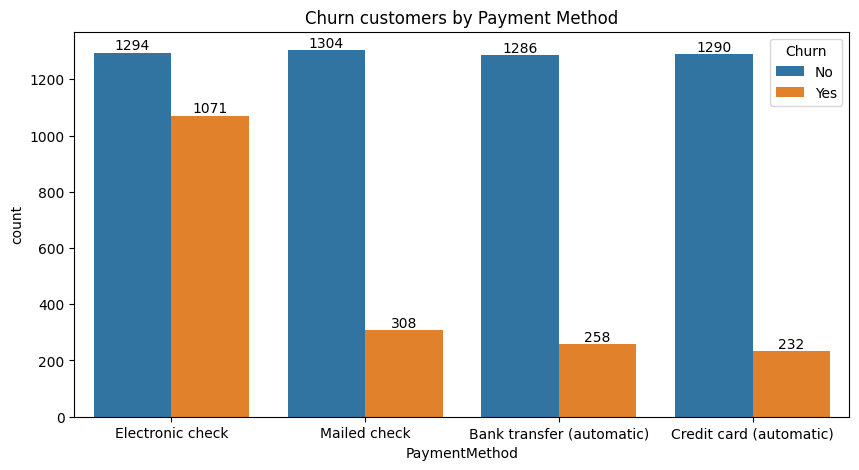

In [31]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x=df['PaymentMethod'], hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn customers by Payment Method')
plt.show()

# Telco Customers Churn Analysis Conclusions

## Content Summary:
1. **Data Loading and Inspection:**
   - The dataset contains 7,043 rows and 21 columns, related to customer demographics, services, and churn status.
   - Columns include features like `CustomerID`, `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `tenure`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `Churn`, and others.

2. **Key Features:**
   - **Demographics:** `gender`, `SeniorCitizen`, `Partner`, `Dependents`
   - **Customer Account Information:** `tenure`, `Contract`, `PaperlessBilling`, `PaymentMethod`
   - **Services Opted:** `PhoneService`, `InternetService`, `OnlineSecurity`, `TechSupport`, etc.
   - **Financial:** `MonthlyCharges`, `TotalCharges`
   - **Target Variable:** `Churn` (Yes/No)

## Observations and Insights:

### 1. Churn Distribution:
   - Approximately **73.4%** of customers did not churn, while **26.6%** of customers churned. 
   - This shows that churn is a significant issue for over a quarter of the customer base.

### 2. Contract Type & Churn:
   - Customers on a **Month-to-month** contract account for **55%** of the total customers, and they are the most likely to churn.
   - **One-year** and **Two-year** contracts, which account for **20%** and **25%** of the customers respectively, have lower churn rates. These longer contracts show better retention compared to month-to-month contracts.

### 3. Payment Methods & Churn:
   - Customers using **Electronic check** as their payment method make up **34.6%** of the dataset and have the highest churn rate.
   - In contrast, **Bank transfer (automatic)** and **Credit card (automatic)** payments have significantly lower churn rates, with **16%** and **16.7%** of customers using these methods, respectively.

### 4. Senior Citizen Factor:
   - **16%** of the customers are senior citizens, and this group shows a higher likelihood of churning compared to non-senior citizens.

### 5. Dependents and Churn:
   - Customers without dependents make up **70%** of the dataset and churn at a higher rate compared to those with dependents, who account for **30%** of the customer base.

### 6. Internet Service & Churn:
   - **Fiber optic** internet service has the highest churn rate, with **42%** of the customers using it churning.
   - **DSL** service users have a lower churn rate, with only **16%** churn.
   - Customers without internet service account for the smallest churn percentage, reflecting more stable service usage.

## Conclusion:
This analysis highlights the key factors contributing to customer churn, with significant risks observed among customers with **month-to-month contracts**, those using **electronic check** as a payment method, and those subscribed to **fiber optic** internet. In contrast, customers on longer contracts, using automated payment methods, or who have dependents tend to churn less. Senior citizens also represent a higher churn risk, warranting targeted retention strategies. These insights provide a foundation for customer retention efforts to reduce churn and improve satisfaction.